In [1]:
"""Setup for Fused_ZS6D"""
stride = 14
image_size_sd = 960
image_size_dino = 840
layer = 11
facet = 'token'
model_type = 'dinov2_vitb14'

In [2]:
from external.sd_dino.extractor_sd import load_model

# Instantiating the stable diffusion model:
model_sd, aug_sd = load_model(diffusion_ver="v1-5", image_size=image_size_sd, num_timesteps=100)


LatentDiffusion: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, con

/home/kilian/miniconda3/envs/zs6d_sd_dino/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.,category_head.clip.clip.,clip_head.clip.clip.
backbone.feature_projections.2.0.conv1.weight
backbone.feature_projections.2.0.shortcut.weight
backbone.feature_projections.3.0.conv1.weight
backbone.feature_projections.3.0.shortcut.weight
backbone.feature_projections.4.0.conv1.weight
backbone.feature_projections.4.0.shortcut.weight
backbone.feature_projections.5.0.conv1.weight
backbone.feature_projections.5.0.shortcut.weight


In [3]:
from zs6dsddino import ZS6DSdDino
import os
import json

# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop_sd_dino.json"), "r") as f:
    config = json.load(f)

# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator_sd_dino = ZS6DSdDino(model_sd, aug_sd, image_size_dino, image_size_sd, layer, facet,
                                    config['templates_gt_path'], config['norm_factor_path'], model_type=model_type,
                                    stride=stride)


Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dinov2_main
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
100%|██████████| 21/21 [02:45<00:00,  7.88s/it]


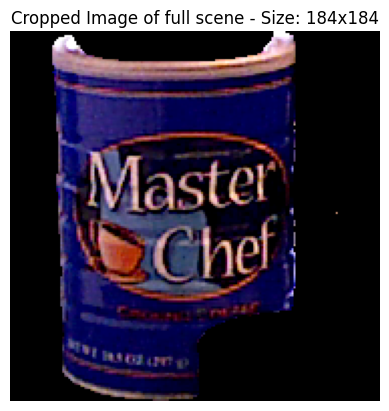

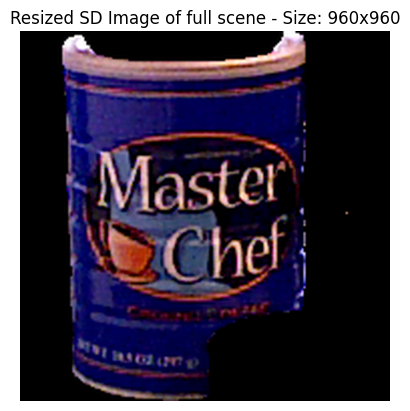

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


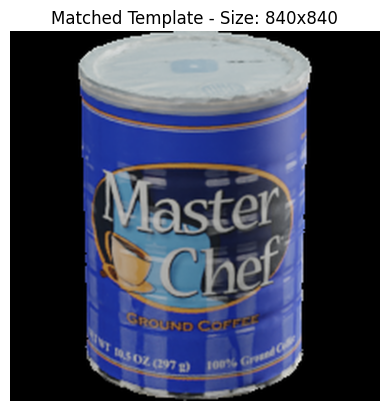

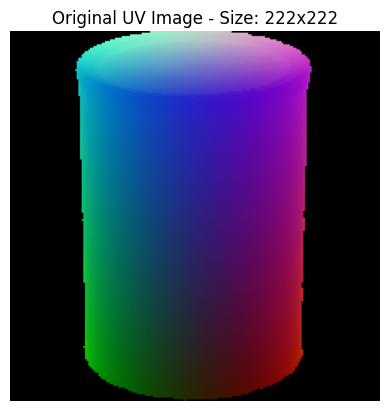

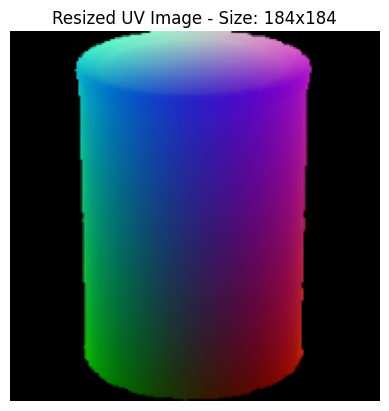

resize_factor = 1.0
valid points 1
[(13, 32), (16, 26), (19, 23), (19, 26), (19, 29), (19, 139), (23, 133), (26, 133), (26, 136), (26, 139), (29, 32), (29, 38), (157, 26), (164, 32), (167, 26), (170, 32), (173, 32), (173, 38), (173, 41), (173, 29), (176, 38), (176, 53), (179, 62), (179, 75), (179, 84), (179, 87), (182, 75), (182, 87), (32, 127), (32, 133), (32, 139), (32, 142), (35, 111), (35, 133), (38, 136), (41, 130), (41, 133), (44, 130), (50, 139), (50, 142), (53, 139), (78, 130), (50, 59), (50, 62), (53, 56), (53, 62), (53, 124), (56, 41), (56, 50), (56, 56), (56, 62), (56, 121), (59, 44), (59, 56), (59, 121), (124, 50), (133, 78), (35, 23), (50, 26), (56, 29), (59, 35), (62, 26), (62, 29), (65, 26), (90, 23), (130, 32), (65, 105), (69, 87), (69, 96), (69, 115), (75, 72), (75, 93), (75, 108), (78, 99), (78, 108), (81, 99), (81, 108), (84, 102), (87, 59), (87, 69), (87, 75), (87, 96), (90, 75), (93, 72), (96, 78), (96, 84), (96, 90), (99, 75), (102, 81), (102, 93), (102, 105), (10

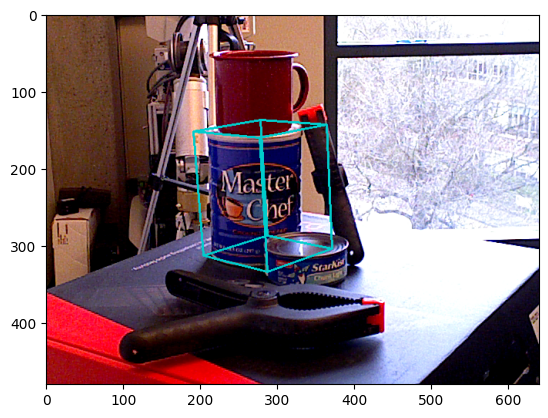

Pose estimation time: 17.876376390457153
R_est: [[ 0.72315753 -0.68878672  0.05114724]
 [ 0.11611821  0.19424309  0.97405656]
 [-0.68085222 -0.69845721  0.22044904]]
t_est: [  25.46120022    9.71460417 -908.42740701]


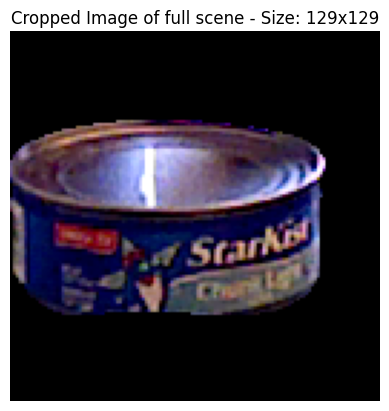

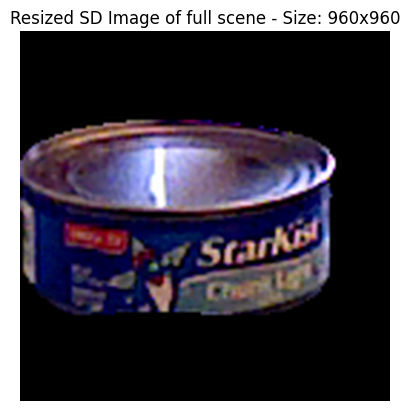

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


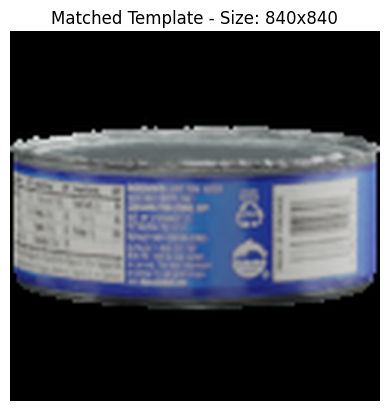

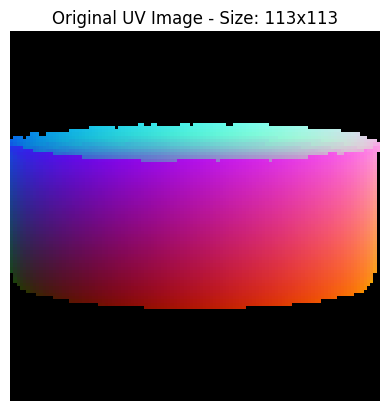

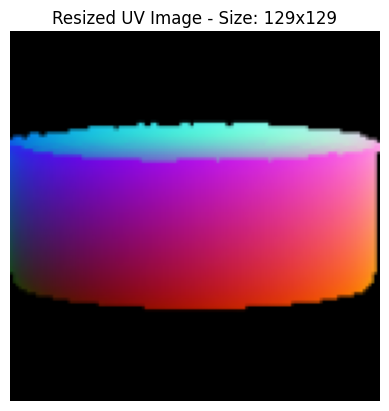

resize_factor = 1.0
valid points 1
[(33, 67), (35, 44), (35, 50), (35, 56), (35, 69), (35, 72), (37, 41), (37, 63), (37, 72), (39, 78), (41, 22), (41, 44), (41, 72), (41, 91), (44, 67), (48, 82), (48, 99), (50, 87), (52, 72), (54, 95), (56, 59), (59, 31), (59, 33), (59, 61), (61, 54), (29, 52), (31, 37), (31, 41), (31, 44), (31, 50), (31, 72), (31, 76), (33, 69), (33, 78), (33, 84), (39, 106), (74, 46), (80, 33), (93, 35), (82, 95), (84, 87), (87, 91), (91, 76), (41, 7), (46, 3), (48, 110), (54, 1), (63, 110), (67, 108), (74, 1), (76, 1), (78, 1), (78, 110), (80, 1), (80, 108), (82, 1), (84, 1), (84, 106), (87, 106), (91, 102), (91, 104), (95, 11), (95, 13), (95, 97), (97, 18), (97, 63), (52, 108), (54, 97), (56, 99), (59, 87), (59, 89), (59, 106), (61, 13), (61, 20), (61, 87), (61, 89), (61, 99), (63, 13), (63, 20), (63, 80), (63, 87), (63, 97), (63, 99), (65, 87), (65, 91), (67, 82), (67, 87), (65, 1), (65, 16), (65, 20), (67, 13), (67, 31), (69, 84), (76, 26), (78, 29), (80, 18), (8

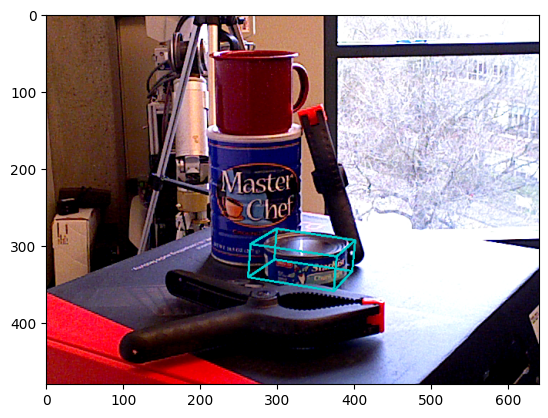

Pose estimation time: 7.018918037414551
R_est: [[ 0.95545264  0.28339622  0.08244295]
 [ 0.12565995 -0.13784977 -0.9824495 ]
 [-0.26705773  0.94904374 -0.16732048]]
t_est: [ 16.44960393  58.44331559 826.9275301 ]


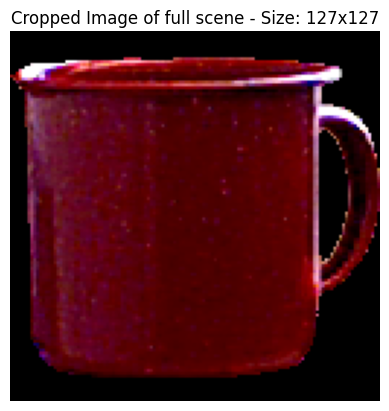

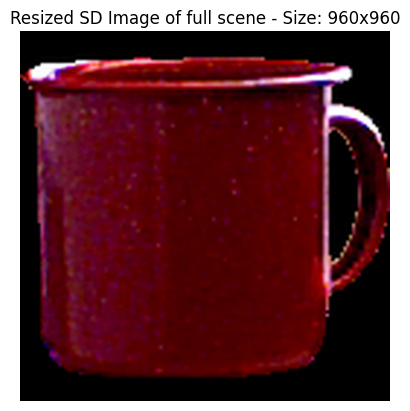

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


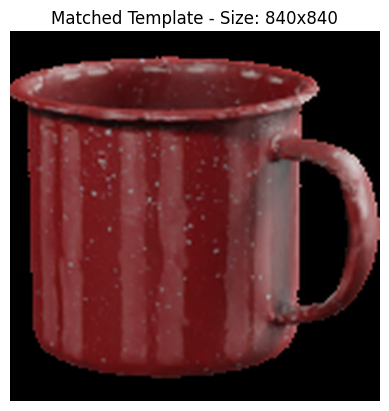

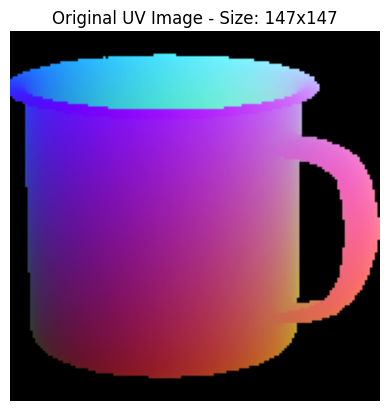

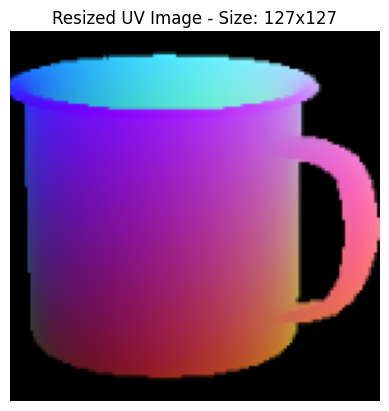

resize_factor = 1.0
valid points 1
[(24, 5), (26, 5), (26, 9), (34, 11), (37, 11), (41, 11), (43, 13), (51, 9), (53, 9), (58, 9), (60, 7), (62, 5), (62, 7), (87, 9), (96, 9), (98, 7), (98, 11), (100, 11), (102, 9), (102, 104), (104, 11), (104, 13), (106, 7), (109, 100), (109, 102), (111, 15), (111, 17), (111, 28), (113, 32), (115, 15), (115, 28), (115, 32), (115, 41), (115, 85), (115, 94), (115, 96), (117, 24), (117, 26), (117, 28), (117, 30), (117, 41), (117, 43), (117, 47), (117, 89), (58, 56), (58, 58), (79, 56), (94, 73), (104, 58), (106, 37), (106, 41), (106, 73), (109, 26), (109, 39), (109, 41), (109, 43), (109, 58), (109, 66), (111, 43), (111, 56), (113, 37), (9, 37), (9, 56), (9, 77), (9, 98), (66, 41), (68, 37), (75, 47), (79, 24), (81, 37), (83, 26), (87, 41), (87, 53), (89, 41), (89, 56), (92, 41), (94, 28), (94, 45), (94, 53), (98, 28), (98, 39), (100, 43), (106, 39), (106, 45), (109, 28), (26, 94), (83, 96), (85, 94), (87, 98), (89, 87), (89, 89), (94, 81), (94, 83), (94, 

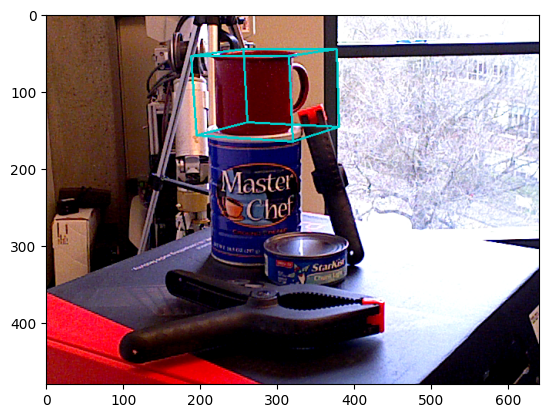

Pose estimation time: 7.1005778312683105
R_est: [[ 0.84866041  0.52735988 -0.04082982]
 [ 0.09189289 -0.22301682 -0.9704737 ]
 [-0.52089462  0.81985063 -0.23772617]]
t_est: [ -21.37392204 -111.21771099  849.53102453]


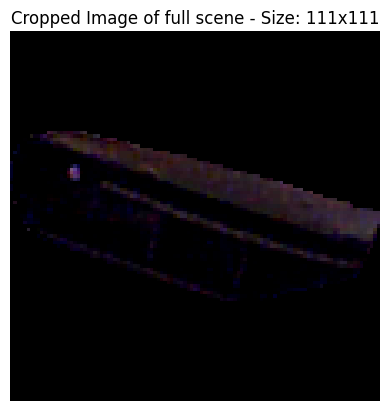

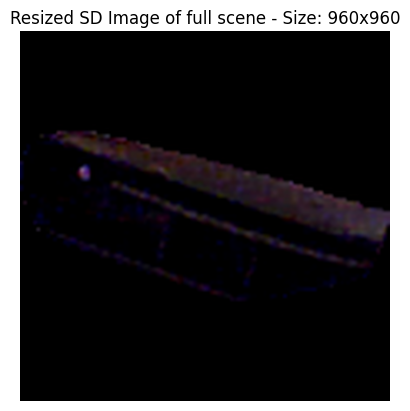

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


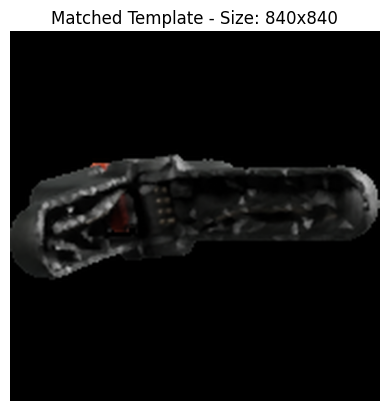

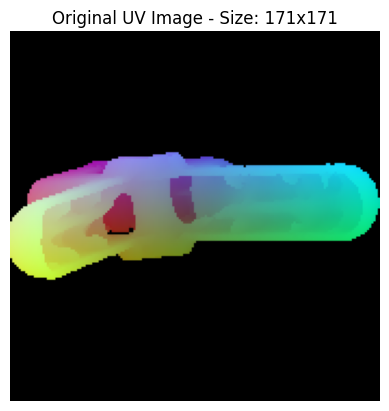

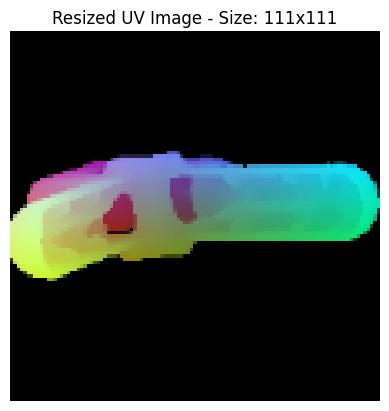

resize_factor = 1.0
valid points 1
[(32, 6), (32, 32), (47, 87), (50, 2), (52, 0), (52, 106), (58, 6), (63, 110), (65, 106), (74, 97), (78, 80), (78, 82), (30, 13), (36, 36), (37, 24), (37, 26), (37, 28), (39, 28), (43, 34), (43, 43), (43, 69), (45, 30), (45, 34), (50, 37), (50, 58), (50, 89), (50, 95), (52, 47), (52, 73), (52, 93), (54, 108), (56, 39), (56, 54), (56, 82), (56, 95), (58, 37), (58, 82), (58, 89), (63, 76), (65, 78), (74, 52)]
valid points 1 after transformation
[[ 32.   6.]
 [ 32.  32.]
 [ 47.  87.]
 [ 50.   2.]
 [ 52.   0.]
 [ 52. 106.]
 [ 58.   6.]
 [ 63. 110.]
 [ 65. 106.]
 [ 74.  97.]
 [ 78.  80.]
 [ 78.  82.]
 [ 30.  13.]
 [ 36.  36.]
 [ 37.  24.]
 [ 37.  26.]
 [ 37.  28.]
 [ 39.  28.]
 [ 43.  34.]
 [ 43.  43.]
 [ 43.  69.]
 [ 45.  30.]
 [ 45.  34.]
 [ 50.  37.]
 [ 50.  58.]
 [ 50.  89.]
 [ 50.  95.]
 [ 52.  47.]
 [ 52.  73.]
 [ 52.  93.]
 [ 54. 108.]
 [ 56.  39.]
 [ 56.  54.]
 [ 56.  82.]
 [ 56.  95.]
 [ 58.  37.]
 [ 58.  82.]
 [ 58.  89.]
 [ 63.  76.]
 [ 65.  78.

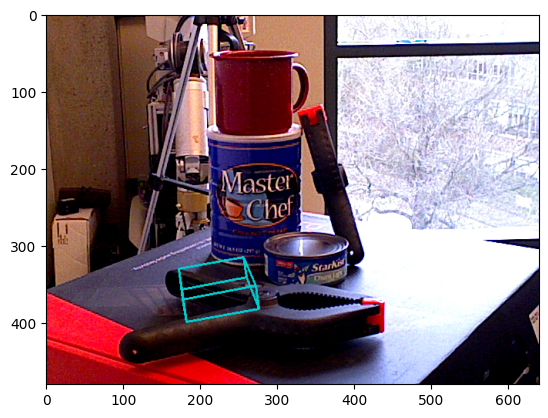

Pose estimation time: 6.704957485198975
R_est: [[-0.97733084 -0.16586696  0.13157731]
 [ 0.16479131 -0.20578701  0.96462196]
 [-0.13292201  0.96443759  0.22845543]]
t_est: [-120.80818297  150.78971834 1414.94088818]


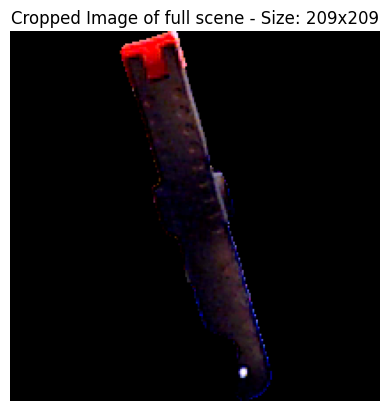

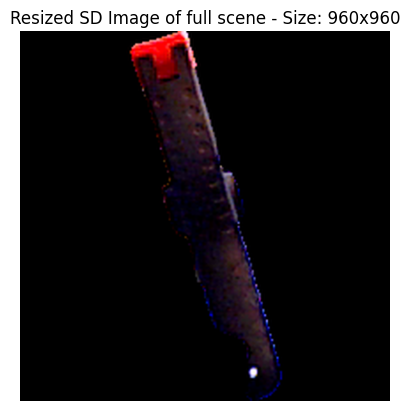

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


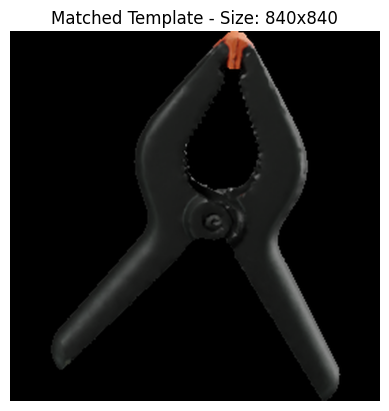

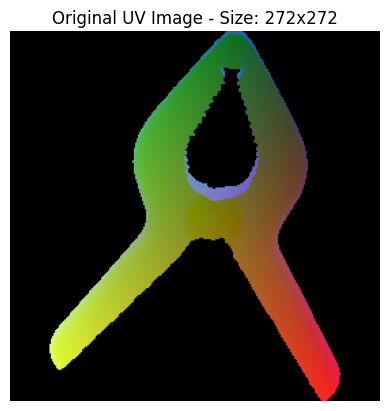

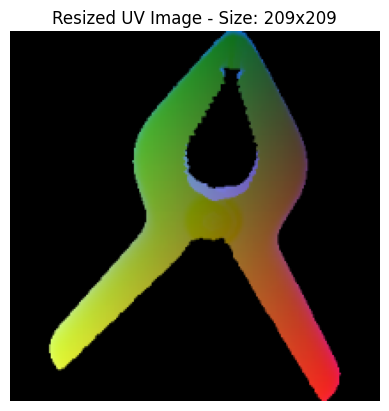

resize_factor = 1.0
valid points 1
[(5, 78), (5, 81), (15, 95), (26, 78), (29, 81), (29, 99), (33, 67), (40, 88), (71, 109), (88, 116), (95, 88), (165, 130), (141, 102), (148, 106), (165, 116), (165, 137), (186, 127), (189, 137), (189, 144), (196, 148), (200, 144), (203, 127)]
valid points 1 after transformation
[[  5.  78.]
 [  5.  81.]
 [ 15.  95.]
 [ 26.  78.]
 [ 29.  81.]
 [ 29.  99.]
 [ 33.  67.]
 [ 40.  88.]
 [ 71. 109.]
 [ 88. 116.]
 [ 95.  88.]
 [165. 130.]
 [141. 102.]
 [148. 106.]
 [165. 116.]
 [165. 137.]
 [186. 127.]
 [189. 137.]
 [189. 144.]
 [196. 148.]
 [200. 144.]
 [203. 127.]]


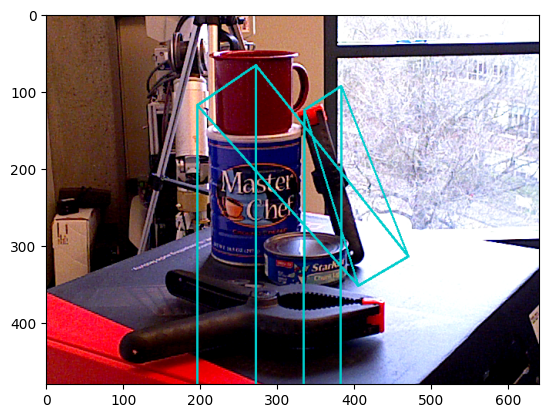

Pose estimation time: 6.924150466918945
R_est: [[-0.14222177  0.54514571 -0.82618952]
 [-0.60288807  0.61427987  0.50910335]
 [ 0.7850471   0.57050538  0.24129787]]
t_est: [   0.60798526   69.95959368 -540.44888052]


In [4]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt
import torch


# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1' # for ycbv
#img_id = '36' # for lmo

device = 'cuda' if torch.cuda.is_available() else 'cpu'

patch_size = 14 #extractor.model.patch_embed.patch_size[0]
num_patches = int(patch_size / stride * (image_size_dino // patch_size))



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = "./test/000002.png"
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator_sd_dino.get_pose(num_patches, img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")
